#### Apoorva Patel Capstone Project

# CUSTOMER CHURN PREDICTION

### ##Introduction
---
ConnectTel Telecom Company is a leading global telecommunications company known for its innovative connectivity solutions. ConnectTel offer reliable voice, data, and Internet services, including mobile networks, broadband, and enterprise solutions. Serving both individuals and corporations, ConnectTel prioritizes exceptional customer service and advanced technology. With strategic partnerships and a customer-centric approach, they are reshaping the telecom industry and enabling seamless communication worldwide.

### ##Problem Overview
---
ConnectTel is confronted with a critical challenge: tackling customer churn, a formidable obstacle to its ongoing viability and expansion. Regrettably, the company's existing tactics for retaining customers lack precision and effectiveness, leading to the unfortunate departure of valuable clientele to rival companies.

### ##Objective
---
To overcome this challenge, ConnectTel aims to develop a robust customer churn prediction system. The company seeks to accurately forecast customer churn and implement targeted retention initiatives. Reduce customer attrition, enhance customer loyalty, and maintain a competitive edge in the highly dynamic and competitive telecommunications industry.

### ##Task
---
- Identify trends and patterns in customers leading to churning.
- Revenue lost due to customer churn.
- Build a machine learning model to predict customer churn.

### 1.1 Import of Libraries

In [2]:
# Data Analysis and Visualization Libraries
import numpy as np
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Classification and Evaluation Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

### 1.2 Import of Dataset

In [3]:
# import of dataset

df = pd.read_csv('cus_churn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### 1.3 Data Assessment

In [4]:
# check dataset dimensionality

rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 7043
Number of columns: 21


In [5]:
# check dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# statistical description of numerical features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [7]:
# statistical description of categorical features

df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [8]:
# check for duplicated values

dup = df.duplicated().sum()
print("Number of duplicates:", dup)

Number of duplicates: 0


In [9]:
# check for null values

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

*11 missing data points can be observed in the Total Charges column*

### 1.4 Data Wrangling

In [10]:
# removal of rows with missing data

df.dropna(inplace=True)

In [11]:
# Updating wrongly labeled data points: some data cells has 'No phone service' and 'No internet service' intead of 'No' 

column_update = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Looping through columns and replace 'No phone service' and 'No internet service' with 'No'
for c in column_update:
    df[c] = df[c].replace('No phone service', 'No')
    df[c] = df[c].replace('No internet service', 'No')

## 2.0 EXPLORATORY DATA ANALYSIS

### 2.1 Univariate Analysis

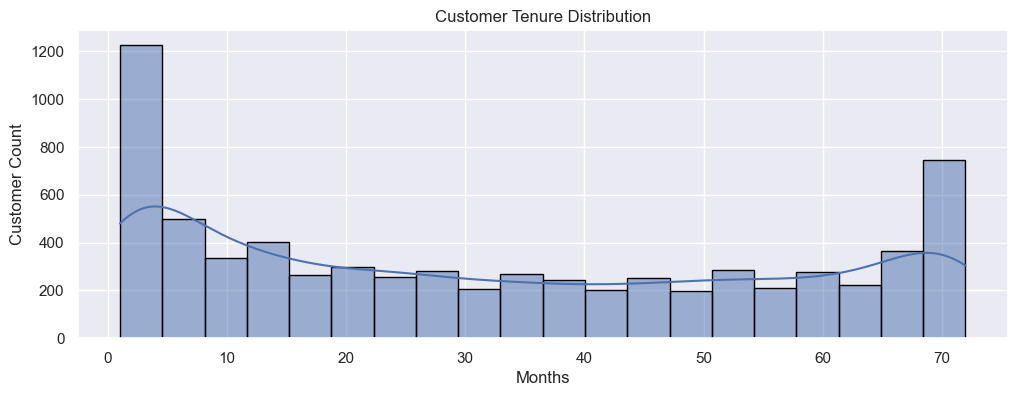

In [12]:
# Distribution of customer tenure
plt.figure(figsize=(12,4))
sns.histplot(df['tenure'], edgecolor='black', bins=20, kde=True)
plt.title('Customer Tenure Distribution')
plt.xlabel('Months')
plt.ylabel('Customer Count');

*Observation:* Very new customers (<5 months tenure) and very old customers (>=70 months tenure) form a large proportion of ConnectTel customer base.

Skewness of MonthlyCharges: -0.22


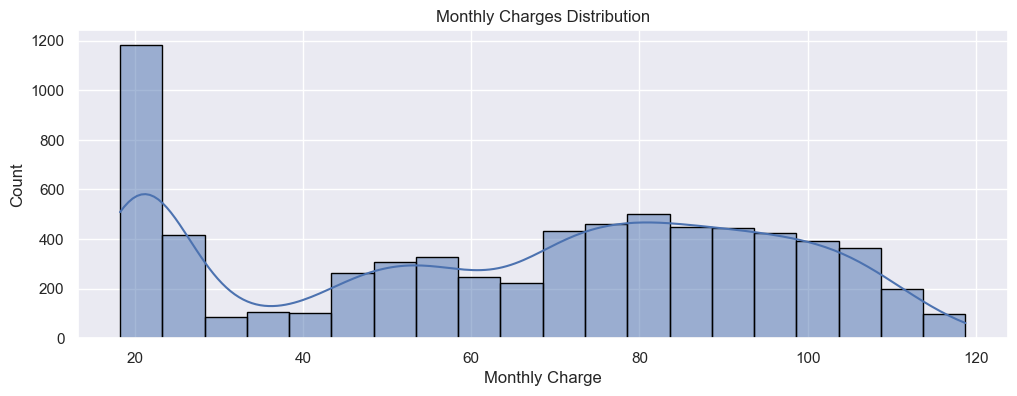

In [13]:
# Distribution of monthly charges
plt.figure(figsize=(12,4))
sns.histplot(df['MonthlyCharges'], edgecolor='black', bins=20, kde=True)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charge')
plt.ylabel('Count');

# Calculate the skewness of the MonthlyCharges
monthly_charges_skewness = skew(df['MonthlyCharges'])
print(f"Skewness of MonthlyCharges: {monthly_charges_skewness:.2f}")

*Observation:* Monthly charges are approximately normally distributed with most customers paying a recurring charge of around 80 USD monthly though customers paying about 20 USD monthly forms a significant base.

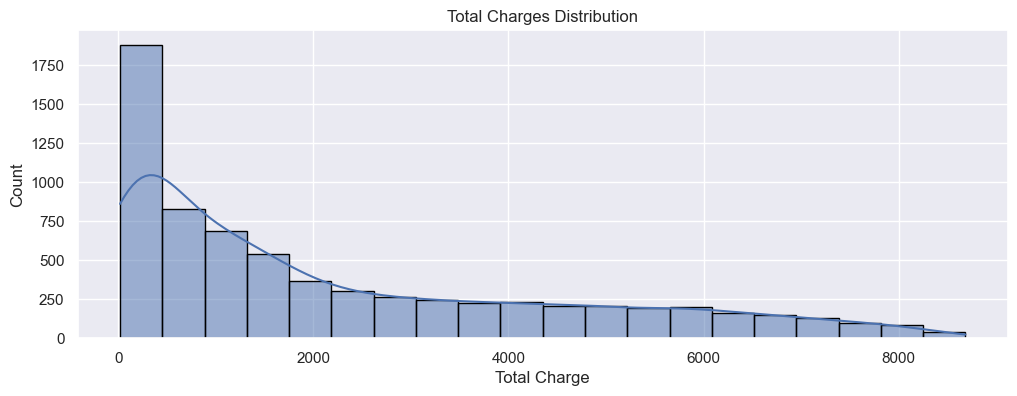

In [14]:
# Distribution of total charges
plt.figure(figsize=(12,4))
sns.histplot(df['TotalCharges'], edgecolor='black', bins=20, kde=True)
plt.title('Total Charges Distribution')
plt.xlabel('Total Charge')
plt.ylabel('Count');

*Observation*: Total Charges accrued from customers are positively skewed with a large proportion of customers bringing in total revenue of less than 2000 USD. Thus, high revenue-generating customers are few.

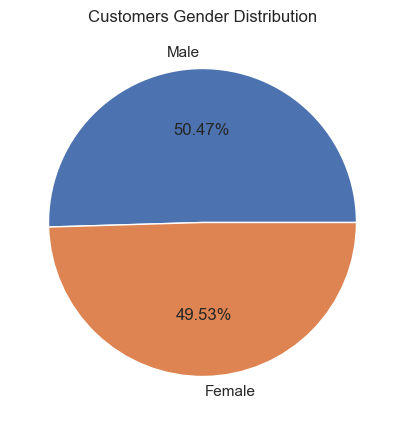

In [15]:
# Customers gender distribution
plt.figure(figsize=(5,5))
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.2f%%')
plt.title('Customers Gender Distribution');

*Observation:* ConnectTel customers' gender distribution is approximately the same between males and females.

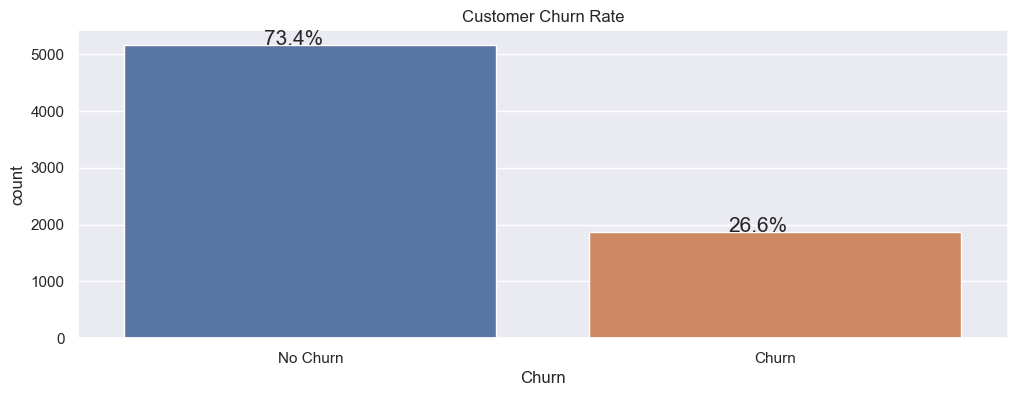

In [16]:
# Count of customer churn
plt.figure(figsize=(12,4))
ax = sns.countplot(data=df, x='Churn')
plt.title('Customer Churn Rate')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn']);

# Percentage calculation
total = float(len(df['Churn']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15) 

*Observation:* ConnectTel has a customer churn rate of 26.6% meaning it is losing about 3 of every 10 of its customers.

### 2.2 Bivariate Analysis

Mean Monthly Charges for Churned Customers: 74.44
Mean Monthly Charges for Retained Customers: 61.31


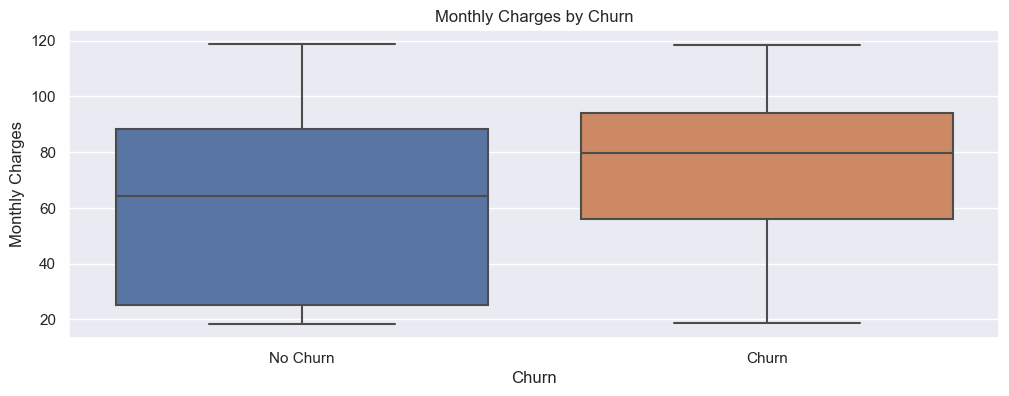

In [17]:
# Monthly charges distribution by customer churn
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Churn')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn']);

# Mean of monthly charges for churned and retained customers
mean_monthly_charges_churned = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()
mean_monthly_charges_retained = df[df['Churn'] == 'No']['MonthlyCharges'].mean()
print(f"Mean Monthly Charges for Churned Customers: {mean_monthly_charges_churned:.2f}")
print(f"Mean Monthly Charges for Retained Customers: {mean_monthly_charges_retained:.2f}")

*Observation:* Most of the churned customers are high-paying customers with more than 50% paying 80 USD monthly and averaging 74.44 USD per month. Retained (No Churn) customers on the other hand give ConnectTel an average of 61.31 USD monthly.

  Churn  MonthlyCharges
0    No       316530.15
1   Yes       139130.85


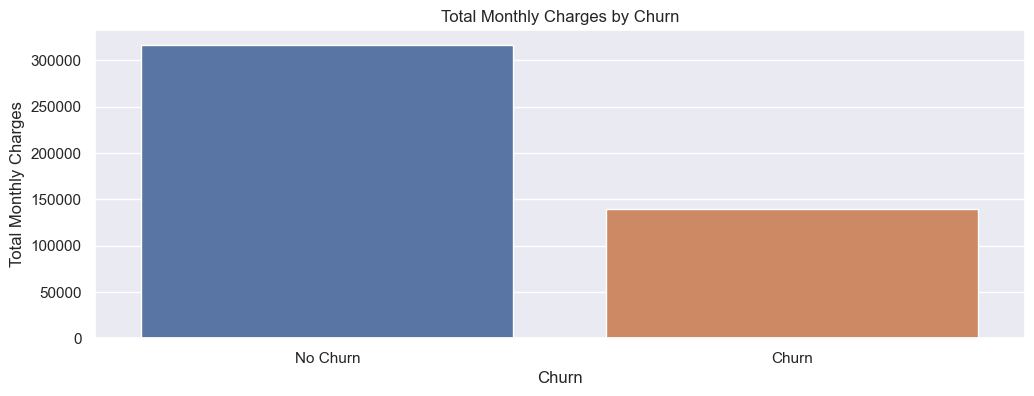

In [18]:
# Calculation of sum monthly charges by customer churn
monthly_charges_by_churn = df.groupby('Churn')['MonthlyCharges'].sum().reset_index()
print(monthly_charges_by_churn)

# visualisation of Total Monthly Charges by Churn
plt.figure(figsize=(12, 4))
sns.barplot(x='Churn', y='MonthlyCharges', data=monthly_charges_by_churn)
plt.ylabel('Total Monthly Charges')
plt.title('Total Monthly Charges by Churn')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn']);

*Observation:* In total, ConnectTel stands to lose 139130.85 USD monthly due to customer churning which is about 1/3 of monthly recurring revenues.

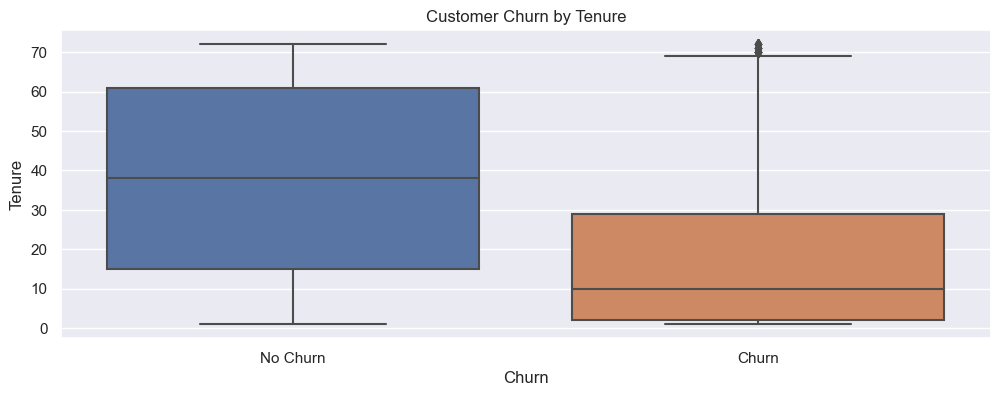

In [19]:
# Customer churn by Tenure
plt.figure(figsize=(12 ,4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Customer Churn by Tenure')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn']);

*Observation:* Customer churn is high among new customers with 50% of churned customers joining ConnectTel in the last 10 months. On the other hand, retained (no churn) customers have high tenure as more than 75% of No Churn customers have been with ConnectTel for more than 15 months.

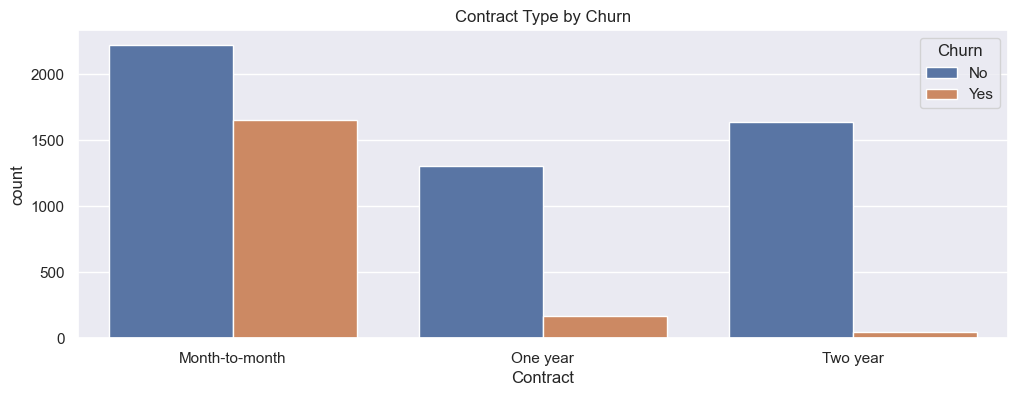

In [20]:
# Customer Contract Type by Churn
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.xlabel('Contract')
plt.title('Contract Type by Churn');

*Observation:* Customer churn tends to be high among customers who make payments on a monthly basis as compared to customers on longer-term contracts.

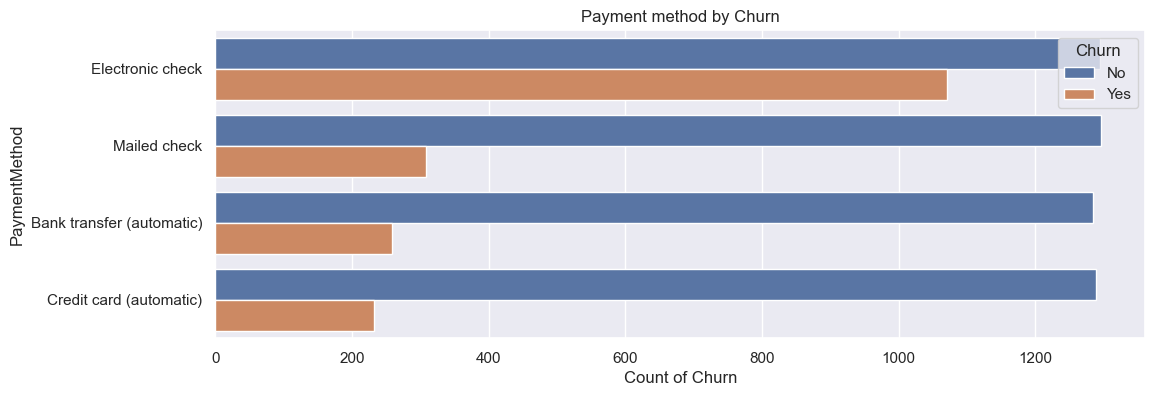

In [21]:
# Payment method by Customer Churn
plt.figure(figsize=(12,4))
sns.countplot(data=df, y='PaymentMethod', hue='Churn')
plt.xlabel('Count of Churn')
plt.title('Payment method by Churn');

*Observation:* Customers using Electronic check for payment are likely to churn out more than customers using other payment methods.

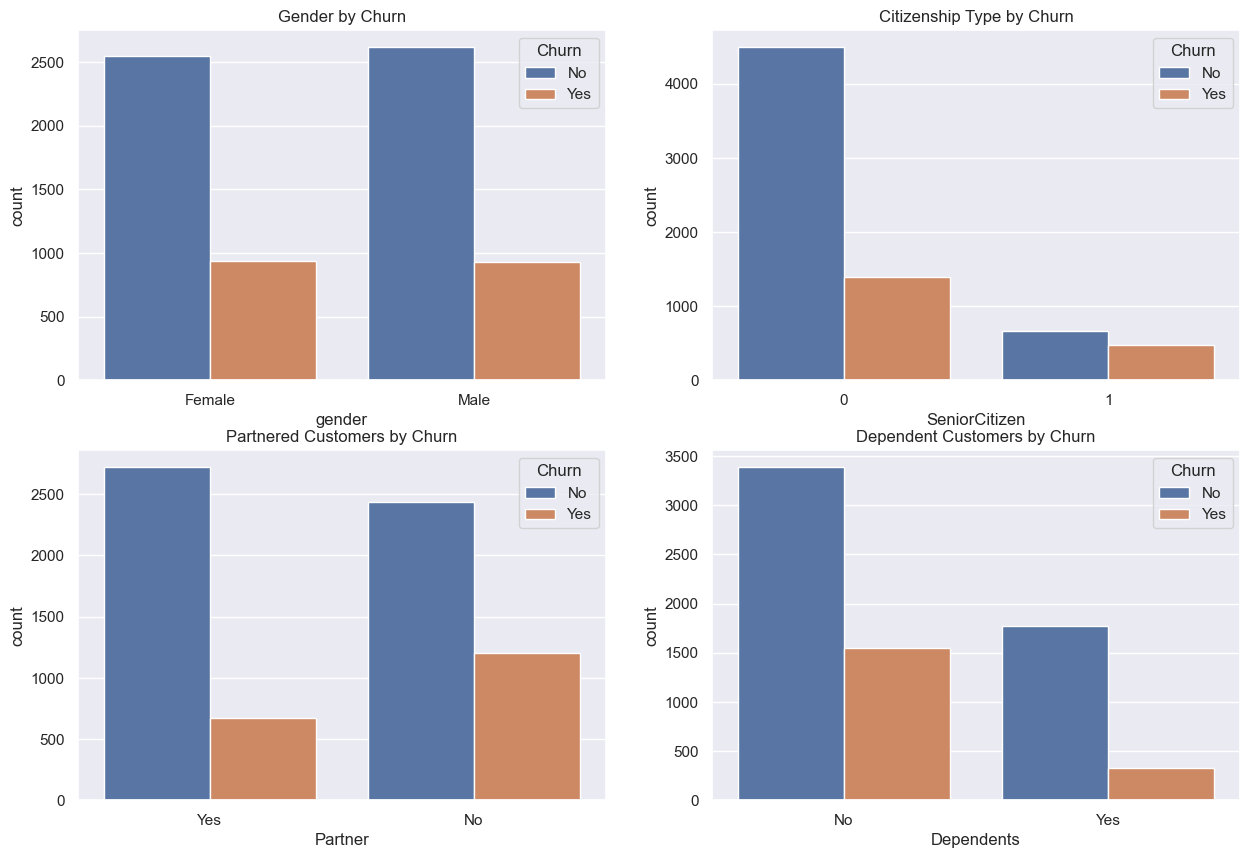

In [22]:
# Customer Demographics by Churn
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# Gender Distribution by Churn
sns.countplot(data=df, x='gender', hue='Churn', ax=axs[0,0])
axs[0,0].set_title('Gender by Churn')

# Citizenship Type by Churn
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=axs[0,1])
axs[0,1].set_title('Citizenship Type by Churn')

# Customer relationship by Churn
sns.countplot(data=df, x='Partner', hue='Churn', ax=axs[1,0])
axs[1,0].set_title('Partnered Customers by Churn')

# Customer dependency by Churn
sns.countplot(data=df, x='Dependents', hue='Churn', ax=axs[1,1])
axs[1,1].set_title('Dependent Customers by Churn');

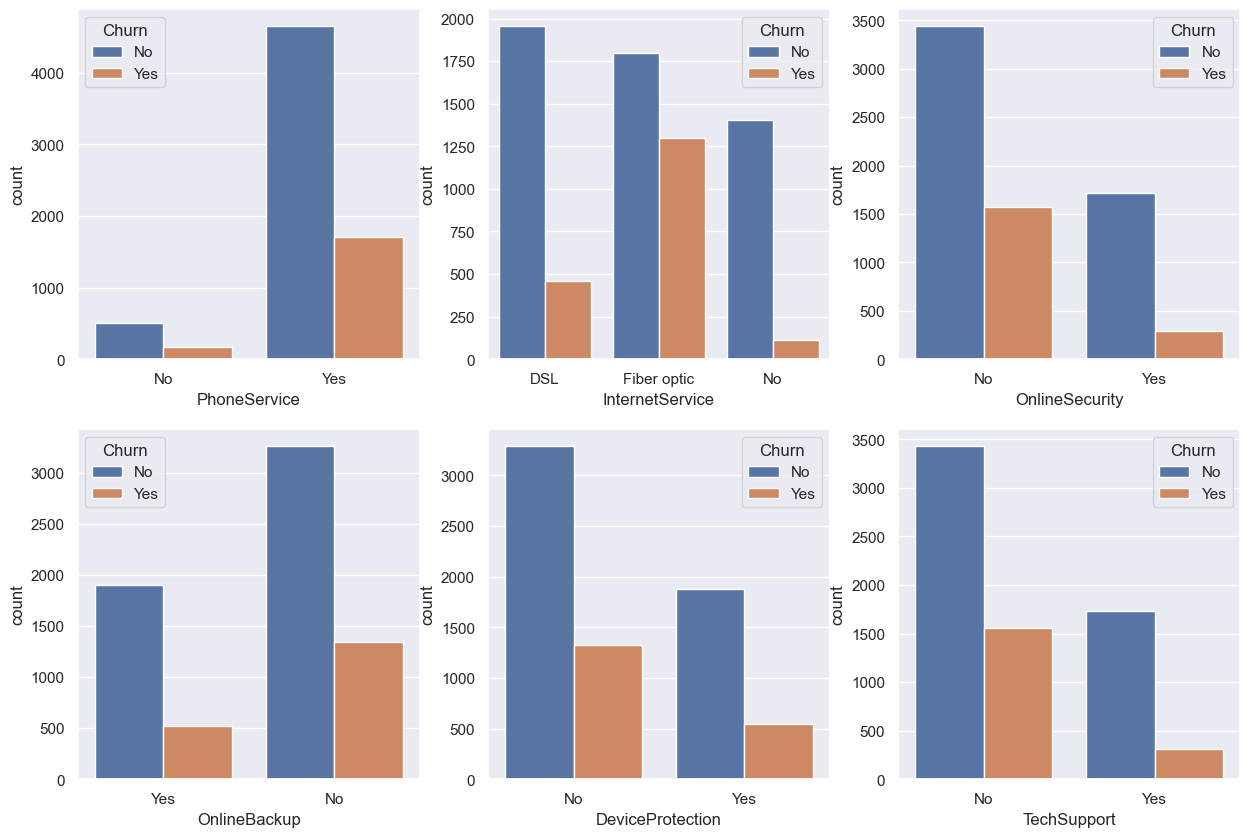

In [23]:
# Services offered to Customers by Churn
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

# Phone Service by Churn
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=axs[0,0])

# Internet Service by Churn
sns.countplot(data=df, x='InternetService', hue='Churn', ax=axs[0,1])

# Online Security Service by Churn
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', ax=axs[0,2])

# Online Backup Service by Churn
sns.countplot(data=df, x='OnlineBackup', hue='Churn', ax=axs[1,0])

# Device Protection Service by Churn
sns.countplot(data=df, x='DeviceProtection', hue='Churn', ax=axs[1,1])

# Tech Support Service by Churn
sns.countplot(data=df, x='TechSupport', hue='Churn', ax=axs[1,2]);

## 3.0 MACHINE LEARNING

### 3.1 Data Preprocessing

In [24]:
# Droping of 'customer id' column

df.drop(columns='customerID', axis=1, inplace=True)

In [25]:
# Encoding of categorical columns into numerical

# columns for label encoding
le_columns = ['Contract', 'Churn']

# columns for one-hot encoding
oh_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


# Fit_transform variables using Label Encoder
label_encoder = LabelEncoder()
for col in le_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Fit_transform variables using One-Hot Encoder
onehot_encoder = OneHotEncoder(sparse=False)
nominal_encoded = onehot_encoder.fit_transform(df[oh_columns])

# Create a DataFrame for one-hot encoded columns with the same index as the original DataFrame
oh_encoded_df = pd.DataFrame(nominal_encoded, columns=onehot_encoder.get_feature_names_out(oh_columns), index=df.index)

# Drop the original columns used for one-hot encoding
df = df.drop(columns=oh_columns)

# Concatenate the one-hot encoded columns to the DataFrame
df = pd.concat([df, oh_encoded_df], axis=1)

df.head(2)

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,29.85,29.85,0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,34,1,56.95,1889.50,0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [26]:
# Segmentation of dataset into predictor variables (x) and target variables (y)

x = df.drop(columns='Churn', axis=1)
y = df['Churn']

In [27]:
# Scaling of predictor variables

# Initialize scaler and fit-tranform data using scaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [28]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, train_size=0.7, random_state=42)

### 3.2 Model Building

### Algorithms for model:
- Logistic Regression
- Naive Bayes
- Random Forest
- Support Vector Machines 

In [29]:
# Logistic Regression 
lr = LogisticRegression()        # instantiate model
lr.fit(X_train, y_train)         # fit model on training set
lr_pred = lr.predict(X_test)     # model prediction

# Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

## 3.3 Model Evaluation
The metrics used for the model evaluation are Recall_Score, Precision_Score, F1_Score, and Accuracy_Score. Recall_Score is the primary metric as it measures the model's ability to identify correctly customers that will churn. It reduces the probability of classifying a customer who will Churn as No-Churn.

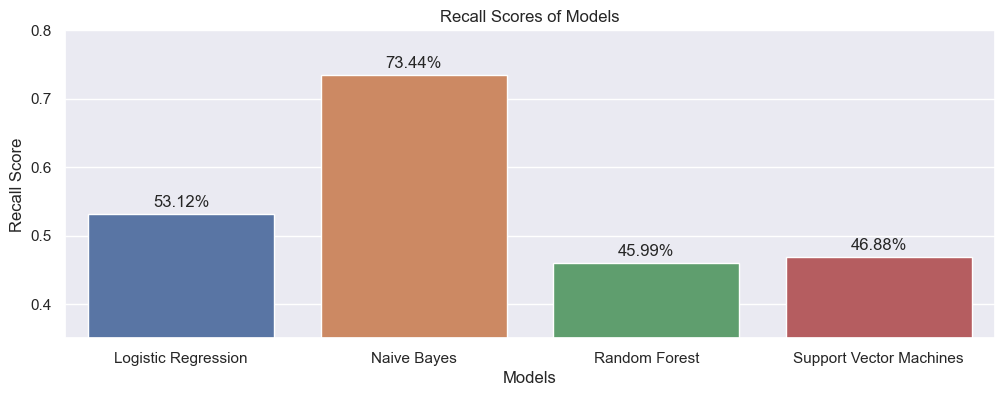

In [30]:
# Recall Scores
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Support Vector Machines']
recall_scores = [recall_score(y_test,lr_pred), recall_score(y_test,nb_pred), recall_score(y_test,rf_pred), recall_score(y_test,svc_pred)]

plt.figure(figsize=(12,4))
sns.barplot(x=models, y=recall_scores)

# Adding percentage labels 
for i, score in enumerate(recall_scores):
    plt.text(i, score + 0.01, f'{score*100:.2f}%', ha='center')

plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.title('Recall Scores of Models')
plt.ylim(0.35, .8); 

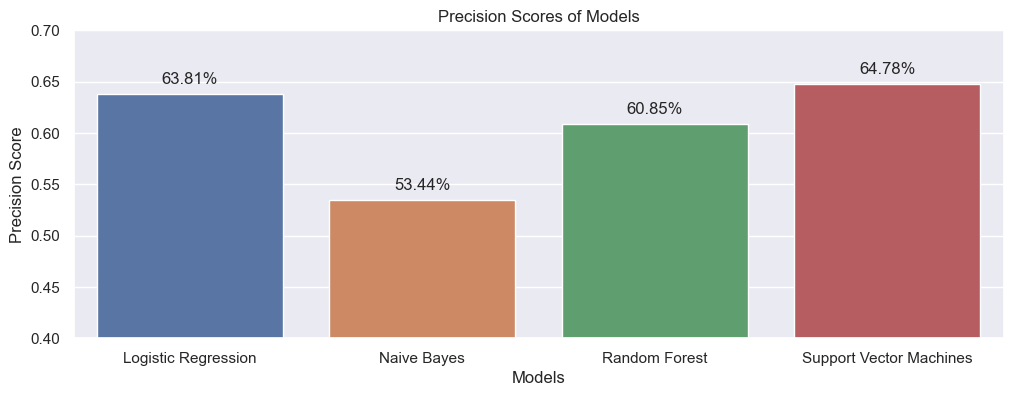

In [31]:
# Precision Scores
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Support Vector Machines']
precision_scores = [precision_score(y_test,lr_pred), precision_score(y_test,nb_pred), precision_score(y_test,rf_pred),  
                    precision_score(y_test,svc_pred)]

plt.figure(figsize=(12,4))
sns.barplot(x=models, y=precision_scores)

# Adding percentage labels 
for i, score in enumerate(precision_scores):
    plt.text(i, score + 0.01, f'{score*100:.2f}%', ha='center')

plt.xlabel('Models')
plt.ylabel('Precision Score')
plt.title('Precision Scores of Models')
plt.ylim(0.4, .7); 

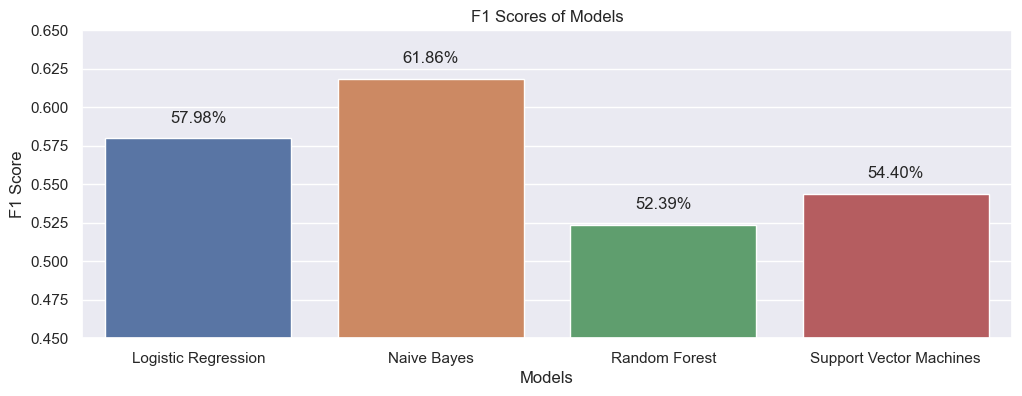

In [32]:
# F1 Scores
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Support Vector Machines']
f1_scores = [f1_score(y_test,lr_pred), f1_score(y_test,nb_pred), f1_score(y_test,rf_pred), f1_score(y_test,svc_pred)]

plt.figure(figsize=(12,4))
sns.barplot(x=models, y=f1_scores)

# Adding percentage labels 
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.01, f'{score*100:.2f}%', ha='center')

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Models')
plt.ylim(0.45, .65);

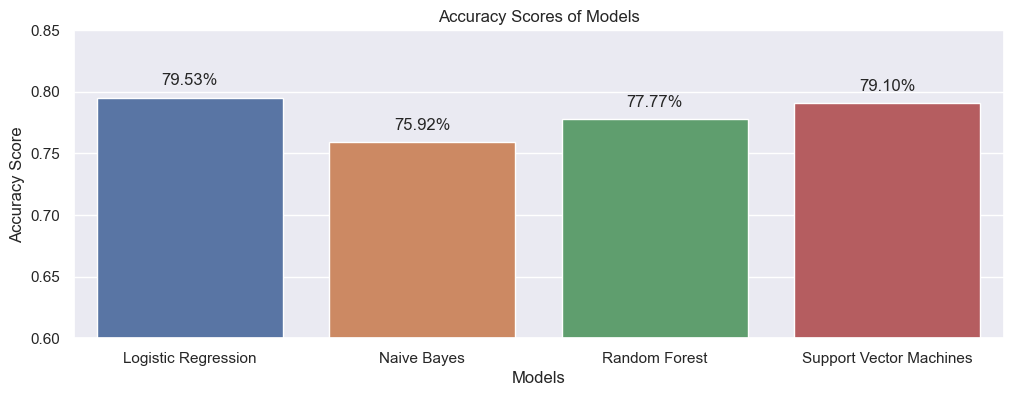

In [33]:
# Accuracy Scores
models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'Support Vector Machines']
accuracy_scores = [accuracy_score(y_test,lr_pred), accuracy_score(y_test,nb_pred), accuracy_score(y_test,rf_pred), accuracy_score(y_test,svc_pred)]

plt.figure(figsize=(12,4))
sns.barplot(x=models, y=accuracy_scores)

# Adding percentage labels 
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f'{score*100:.2f}%', ha='center')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Models')
plt.ylim(0.6, .85); 

*Observation*:
- With Recall_Score being the primary metric, most algorithms did not perform well though the other metrics of Precision_Score, F1_Score and Accuracy_Score were better. Naive Bayes algorithm with a rate of 73.44% gave the best Recall_Score with the other algorithms hovering around 50%.

## 3.4 Hyperparameters Tuning
The hyperparameters of the various algorithms are tuned to improve the Recall_Score using GridSearchCV

In [34]:
# Logistic Regression
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.001, 0.01, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet', None]}

grid_search = GridSearchCV(lr, param_grid, scoring='recall', cv=10)

grid_search.fit(X_train, y_train)

print(f'Best Recall_Score: {grid_search.best_score_}, for {grid_search.best_params_}')

Best Recall_Score: 0.6491368173810923, for {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [35]:
# Naive Bayes
param_grid = {'var_smoothing': np.logspace(0, -9, num=10)}

grid_search = GridSearchCV(nb, param_grid, scoring='recall', cv=10)

grid_search.fit(X_train, y_train)

print(f'Best Recall_Score: {grid_search.best_score_}, for {grid_search.best_params_}')

Best Recall_Score: 0.7760657662947739, for {'var_smoothing': 1.0}


In [36]:
# Random Forest
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 10, 20, 30]}

grid_search = GridSearchCV(rf, param_grid, scoring='recall', cv=10)

grid_search.fit(X_train, y_train)

print(f'Best Recall_Score: {grid_search.best_score_}, for {grid_search.best_params_}')

Best Recall_Score: 0.5268291250733999, for {'max_depth': 10, 'n_estimators': 50}


In [37]:
# Support Vector Machines
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto', 0.1, 1]}

grid_search = GridSearchCV(svc, param_grid, scoring='recall', cv=10)

grid_search.fit(X_train, y_train)

print(f'Best Recall_Score: {grid_search.best_score_}, for {grid_search.best_params_}')

Best Recall_Score: 0.5421374045801526, for {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


*Observation*: 
- After tuning the hyperparameters of all algorithms, Naive Bayes gives the best possible Recall_Score of 0.7761 and is therefore selected for the customer churn prediction model.

## 3.5 Building and Evaluating Model using Naive Bayes (tuned hyperparameter)

Classification Report: Naive Bayes Model
----------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1549
           1       0.51      0.78      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.75      0.71      2110
weighted avg       0.80      0.74      0.76      2110



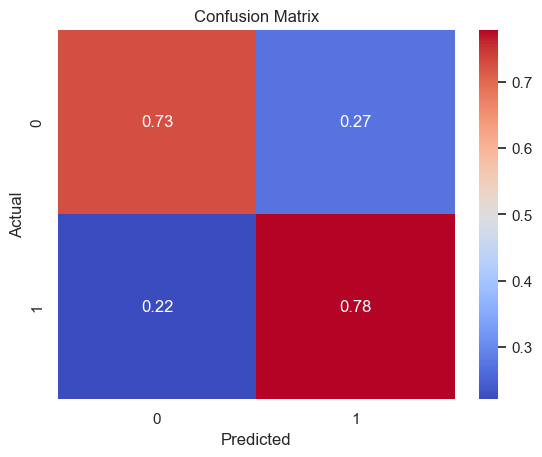

In [38]:
nb_tuned = GaussianNB(var_smoothing= 1.0)
nb_tuned.fit(X_train, y_train)
nb_tuned_pred = nb_tuned.predict(X_test)

print('Classification Report: Naive Bayes Model')
print('----------------------------------------')
print(classification_report(y_test, nb_tuned_pred))

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, nb_tuned_pred, normalize='true'), annot=True, cmap='coolwarm')
ax.set_title('Confusion Matrix')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted');

*Observation*: 
- The selected algorithm for the Customer Churn Prediction model is Naive Bayes with an improved Recall_Score of 78%. That is out of every 5 churn customers the model can identify about 4 of them correctly.

## 4.0 Conclusion

### 4.1 Task
---
In this Project, I set out to understand the customer churn challenge of ConnecTel which is posing an existential threat to the business, and also build a robust customer churn prediction system. From this, the following questions are to be answered:
- What are the trends in customers who are churning out of ConnectTel's business?
- How much revenue is ConnectTel losing due to customer churn?
- How best can churn be managed by leveraging machine learning tools to build a churn prediction system?


### 4.2 Insights
---
1. Customer Churn Rate: ConnectTel has a churn rate of 26.6%, resulting in the loss of approximately 3 out of every 10 customers.
2. Revenue Impact: Customer churn leads to a loss of around 1/3 of the monthly recurring revenue, which amounts to $139,130.85. Churn is more prevalent among high-paying customers than low-paying ones.
3. Customer Tenure Distribution: The majority of ConnectTel's customers fall into two groups: very new and very old. Churn is higher among new customers compared to old customers.
4. Contract Length: Customers with month-to-month contracts are around 8 times more likely to churn than those on longer-term contracts (1 year or 2 years).
5. Payment Methods: Churn is higher among customers using Electronic Check for payment compared to other payment methods.
6. Demographics: Gender has minimal impact on churn, with customers evenly distributed between genders. However, churn is proportionally higher among senior citizens. Churn is lower among partnered and dependent customers.
7. Phone and Internet Services: Phone service has a minimal impact on churn, regardless of whether customers have it or not. In contrast, customers using Fibre Optic internet service exhibit a significantly high churn rate of over 70%, surpassing DSL and no internet service.
8. Support Services: Customers who access support services like Online Security, Online Backup, Device Protection, and Tech Support experience lower churn rates compared to those without such services.

### 4.3 Prediction System
---
A robust customer churn prediction system has been developed for ConnectTel using the Naive Bayes algorithm with other machine learning techniques such as:
- Data Preprocessing and Feature Engineering
- Exploratory Data Analysis
- Model building, Tunind, and Evaluation

The churn prediction system has a recall score of **78%, that is it identifies approximately 4 of every 5 churning customers** which will help reduce churn and revenue loss.
